In [ ]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from scipy.stats import skew, norm, probplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import files 


uploaded = files.upload()

Saving count_data.csv to count_data.csv
Saving song_data (1).csv to song_data (1).csv


In [ ]:
df_s = pd.read_csv('song_data (1).csv', header=None)
df_s.columns = ['song_id', 'title', 'release', 'artist_name','year']

df_c = pd.read_csv('count_data.csv', header=None)
df_c.columns = ['counter','user_id', 'song_id','play_count']


In [ ]:
df_s.head()

,song_id,title,release,artist_name,year
0,song_id,title,release,artist_name,year
1,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
2,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
3,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
4,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003


In [ ]:
df_c.head()

,counter,user_id,song_id,play_count
0,NaN,user_id,song_id,play_count
1,0.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
2,1.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,2.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
4,3.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1


In [ ]:
print(df_s.info())
print('Songs Data shape',df_s.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000001 non-null  object
 1   title        999986 non-null   object
 2   release      999996 non-null   object
 3   artist_name  1000001 non-null  object
 4   year         1000001 non-null  object
dtypes: object(5)
memory usage: 38.1+ MB
None
Songs Data shape (1000001, 5)


In [ ]:
print(df_c.info())
print('Songs Count Data shape', df_c.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000001 entries, 0 to 2000000
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   counter     float64
 1   user_id     object 
 2   song_id     object 
 3   play_count  object 
dtypes: float64(1), object(3)
memory usage: 61.0+ MB
None
Songs Count Data shape (2000001, 4)


In [ ]:
print('Number of missing values across columns-\n', df_s.isnull().sum())

Number of missing values across columns-
 song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64


In [ ]:
print('Number of missing values across columns-\n', df_c.isnull().sum())

Number of missing values across columns-
 counter       1
user_id       0
song_id       0
play_count    0
dtype: int64


In [ ]:
df_s.describe()

,song_id,title,release,artist_name,year
count,1000001,999986,999996,1000001,1000001
unique,999057,702429,149289,72666,178
top,SOEGQML12AF7299C84,Intro,Greatest Hits,Michael Jackson,0
freq,3,1510,2014,194,420876


In [ ]:
df_s.sort_values("song_id", inplace = True) 
  
# dropping ALL duplicte values 
df_s.drop_duplicates(subset ="song_id", 
                     keep = False, inplace = True) 

In [ ]:
# we will describe the data of the songs here to check the cleaning of the Songs id, becuse as we notice that there is
# a duplication on the songs id, and this is not accapted as the song id considred ad the primary key of the songs.
df_s.describe() 

,song_id,title,release,artist_name,year
count,998161,998146,998156,998161,998161
unique,998161,701975,149114,72627,178
top,SOLGRWY12A6BD55BFB,Intro,Greatest Hits,Johnny Cash,0
freq,1,1510,1989,189,420628


In [ ]:
## here we will do the data cleaning by removing the unwanted chracters and numbers

df_s['release']= df_s['release'].str.replace('\d+', '',regex=True)
df_s['release'] = df_s['release'].str.replace('[#,@,&]' , '')
df_s['release'] = df_s['release'].str.replace('[-,--,---,:,",!,..!!!..,...,%,$,/_,+ /,{ ,'',(),=,(((,))),*,?,],]' , '')

df_s['artist_name']= df_s['artist_name'].str.replace('\d+', '',regex=True)
df_s['artist_name'] = df_s['artist_name'].str.replace('[#,@,&]' , '')
df_s['artist_name'] = df_s['artist_name'].str.replace('[-,--,---,:,",!,..!!!..,...,%,$,/_,+ /,{,'',(),=,(((,))),*,?,],]' , '')


df_s['title']= df_s['title'].str.replace('\d+', '',regex=True)
df_s['title'] = df_s['title'].str.replace('[#,@,&]' , '')
df_s['title'] = df_s['title'].str.replace('[-,--,---,:,",!,..!!!..,...,%,$,/_,+ /,{,'',(),=,(((,))),*,?,],]' , '')

#df['E'] = df['B'].str.replace('\W', '')
#'[#,@,&]'   [-,--,---,-  -]

In [ ]:
print('Number of missing values across columns-\n', df_s.isnull().sum())

Number of missing values across columns-
 song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64


In [ ]:
df_s = df_s.dropna(how='any',axis=0)

print('Number of missing values across columns-\n', df_s.isnull().sum())

df_s = df_s.drop(df_s[df_s['title'] == ''].index) 
df_s = df_s.drop(df_s[df_s['release'] == ''].index) 

Number of missing values across columns-
 song_id        0
title          0
release        0
artist_name    0
year           0
dtype: int64


In [ ]:
print('Number of missing values across columns-\n', df_c.isnull().sum())


Number of missing values across columns-
 counter       1
user_id       0
song_id       0
play_count    0
dtype: int64


In [ ]:
#here we will remove any null values on the counts data. 
df_c = df_c.dropna(how='any',axis=0)


print('Number of missing values across columns-\n', df_c.isnull().sum())

Number of missing values across columns-
 counter       0
user_id       0
song_id       0
play_count    0
dtype: int64


In [ ]:
print('Number of unique USERS in Raw data = ', df_c['user_id'].nunique())
print('Number of unique Songs in Raw data = ', df_s['song_id'].nunique())

Number of unique USERS in Raw data =  76353
Number of unique Songs in Raw data =  994820


In [ ]:
df_c.describe()

,counter
count,2.000000e+06
mean,9.999995e+05
std,5.773504e+05
min,0.000000e+00
25%,4.999998e+05
50%,9.999995e+05
75%,1.499999e+06
max,1.999999e+06


In [ ]:
songs_count = df_c.merge(df_s , on = ['song_id'],how='left')


In [ ]:
songs_count

,counter,user_id,song_id,play_count,title,release,artist_name,year
0,0.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,NaN,NaN,NaN,NaN
3,3.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,4.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...,...
1999995,1999995.0,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,1999996.0,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,1999997.0,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,1999998.0,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [ ]:

songs_count[["play_count", "year"]] = songs_count[["play_count", "year"]].apply(pd.to_numeric)
songs_count['user_id'] = songs_count['user_id'].astype('string')
songs_count['song_id'] = songs_count['song_id'].astype('string')
songs_count['title'] = songs_count['title'].astype('string')
songs_count['release'] = songs_count['release'].astype('string')
songs_count['artist_name'] = songs_count['artist_name'].astype('string')

In [ ]:
songs_count.dtypes

counter        float64
user_id         string
song_id         string
play_count       int64
title           string
release         string
artist_name     string
year           float64
dtype: object

In [ ]:
songs_count.shape

(2000000, 8)

In [ ]:
songs_count["play_count"].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,2e+06,3.04548,6.57972,1,1,1,3,2213


In [ ]:
df_c["play_count"] = df_c["play_count"].apply(pd.to_numeric)

In [ ]:
print('{:d} users, {:.2%} of total play counts, listening a single more than 200 times'.format(
    df_c.user_id[df_c.play_count>200].unique().shape[0],
    df_c.play_count[df_c.play_count>200].count()/df_c.shape[0]))
display(df_c.play_count[df_c.play_count>200].describe().reset_index().T)

118 users, 0.01% of total play counts, listening a single more than 200 times


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,140,327.107,209.115,201,225,267,353.75,2213


In [ ]:
df1 = df_c.play_count[df_c.play_count>df_c.play_count.max()-10].values[0]
print('- How much days the most obsessed user can be the fan of a unique song: {:.1f}'.format((df1*3.5)/60/24))
display(df_s[df_s.song_id.isin(
                  df_c[df_c.play_count>df_c.play_count.max()-10].song_id.values)])

- How much days the most obsessed user can be the fan of a unique song: 5.4


,song_id,title,release,artist_name,year
567848,SOFCGSE12AF72A674F,Starshine,Gorillaz,Gorillaz,2000


In [ ]:
 df2 = df_c.play_count[df_c.play_count>df_c.play_count.max()-1500].values[1]
print('- How much days the second df2 user can be the fan of a unique song: {:.1f}'.format((df2*3)/60/24))
display(df_s[df_s.song_id.isin(df_c[df_c.play_count==920].song_id.values)])

- How much days the second df2 user can be the fan of a unique song: 1.9


,song_id,title,release,artist_name,year
927747,SOUAGPQ12A8AE47B3A,Crack Under Pressure,Stress related / Live and learn,Righteous Pigs,1998


Text(0, 0.5, 'Item count')

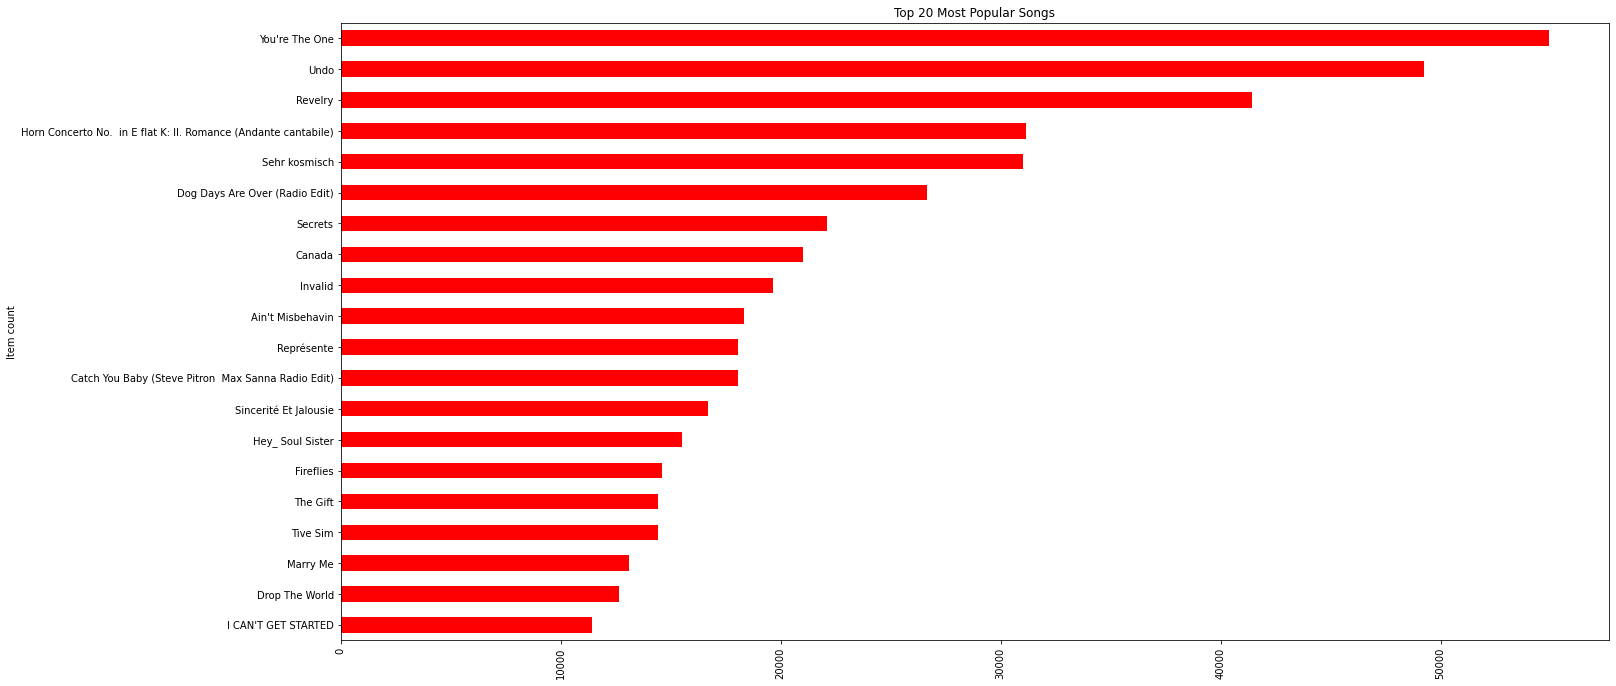

In [ ]:
chart = plt.figure(figsize=(50, 25))
d = chart.add_subplot(221)
popular_songs = songs_count[['title','play_count']].groupby('title').sum().\
                sort_values('play_count', ascending=False).head(20).sort_values('play_count')
popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=d, color = 'red')
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

Text(0, 0.5, 'Item count')

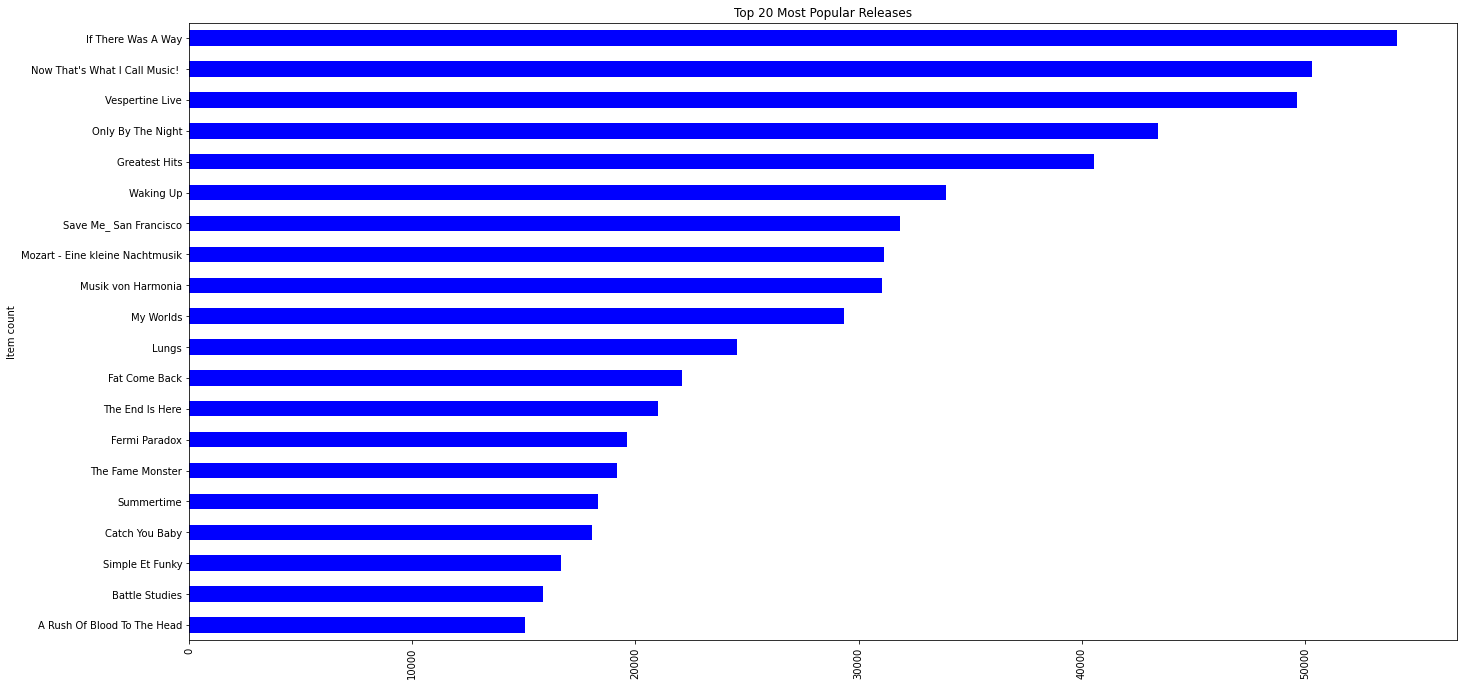

In [ ]:
chart = plt.figure(figsize=(50, 25))
d = chart.add_subplot(221)
popular_release = songs_count[['release','play_count']].groupby('release').sum().\
                sort_values('play_count', ascending=False).head(20).sort_values('play_count')
popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=d, color = 'blue')
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

Text(0, 0.5, 'Item count')

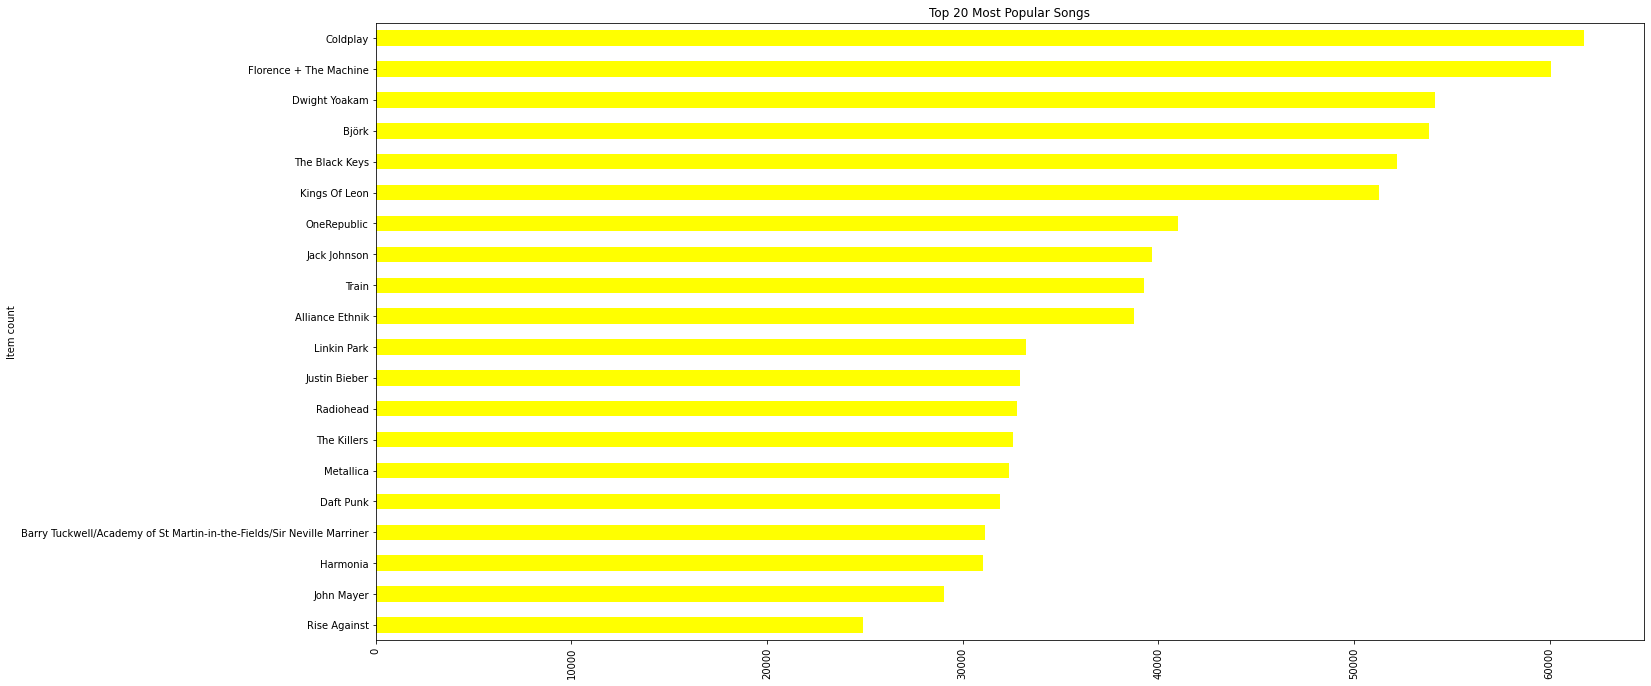

In [ ]:
chart = plt.figure(figsize=(50, 25))
d = chart.add_subplot(221)
popular_artist_name = songs_count[['artist_name','play_count']].groupby('artist_name').sum().\
                sort_values('play_count', ascending=False).head(20).sort_values('play_count')
popular_artist_name.plot(kind='barh', title='Top 20 Most Popular Artist', legend=False, ax=d, color = 'yellow')
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

In [ ]:
user_id_song_count_distribution = songs_count[['user_id','title']].groupby('user_id').count().\
                                reset_index().sort_values(by='title',ascending = False)

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    sns.set_color_codes()
    #ax = sns.distplot(x, color="y")  
    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm,color="y")
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()


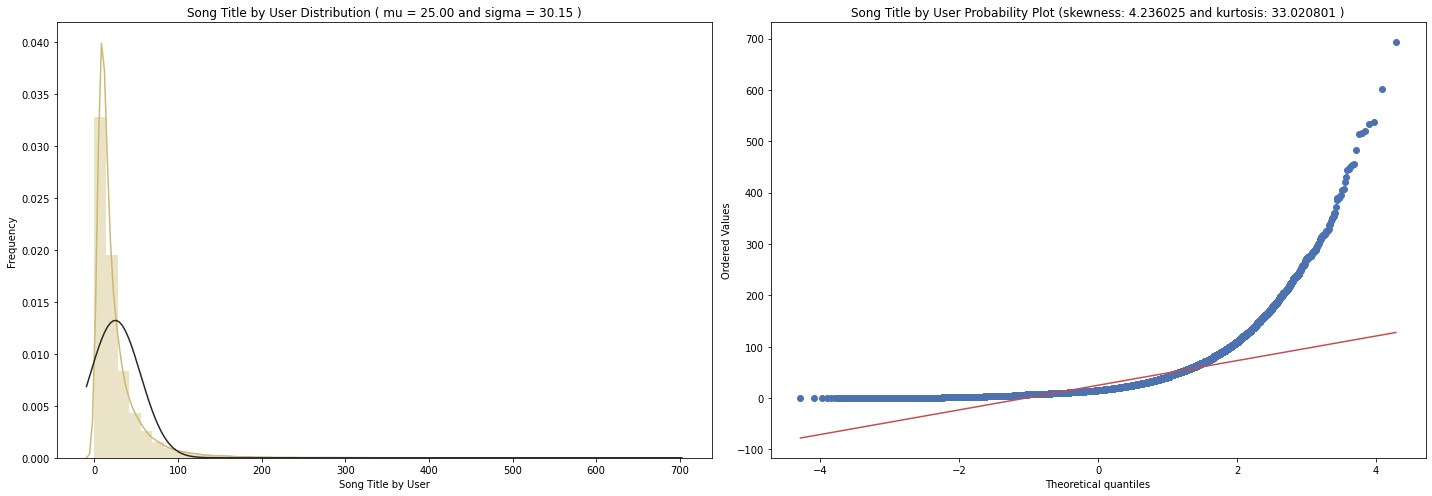

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
title,76353,25.0005,30.1483,0,9,15,30,693


In [ ]:

QQ_plot(user_id_song_count_distribution.title, 'Song Title by User')
user_id_song_count_distribution.title.describe().reset_index().T   

In [ ]:
def create_popularity_recommendation(train_data, user_id, item_id, n=10):

    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    
    train_data_sort['Rank'] = train_data_sort.score.rank(ascending=0, method='first')
        
    popularity_recommendations = train_data_sort.head(n)
    return popularity_recommendations

In [ ]:
recommendations = create_popularity_recommendation(songs_count,'user_id','title', 15)
display(recommendations)

,title,score,Rank
6632,Sehr kosmisch,8277,1.0
8468,Undo,7032,2.0
1893,Dog Days Are Over (Radio Edit),6949,3.0
9221,You're The One,6729,4.0
6307,Revelry,6145,5.0
6621,Secrets,5841,6.0
3327,Horn Concerto No. in E flat K: II. Romance (A...,5385,7.0
2508,Fireflies,4795,8.0
3216,Hey_ Soul Sister,4758,9.0
8243,Tive Sim,4548,10.0


In [ ]:
recommendations = create_popularity_recommendation(songs_count,'user_id','artist_name', 10)
display(recommendations)

,artist_name,score,Rank
633,Coldplay,26272,1.0
2822,The Black Keys,19862,2.0
1079,Florence + The Machine,18112,3.0
1342,Jack Johnson,16012,4.0
2918,The Killers,15087,5.0
720,Daft Punk,14574,6.0
2347,Radiohead,13827,7.0
3146,Train,12535,8.0
2177,OneRepublic,11476,9.0
1620,Kings Of Leon,11408,10.0


In [ ]:

class item_similarity_recommender_py():
    def __init__(self):
        self.training_data = None
        self.user_id = None
        self.id_item = None
        self.cooccurence_matrix = None
        self.songs_dictionary  = None
        self.rev_songs_dictionary = None
        self.item_similarity_recommendations = None
        
  
    def get_user_item(self, user):
        user_data = self.training_data[self.training_data[self.user_id] == user]
        user_items = list(user_data[self.id_item].unique())
        
        return user_items

    def get_items_user(self, item):
        item_data = self.training_data[self.training_data[self.id_item] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        

    def get_all_items_training_data(self):
        all_items = list(self.training_data[self.id_item].unique())
            
        return all_items
 
    def construct_cooccurence_matrix(self, users, songs):
            
 
 
        users_users = []        
        for i in range(0, len(users)):
            users_users.append(self.get_items_user(users[i]))
            
    
	
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(users), len(songs))), float)
           
  
        for i in range(0,len(songs)):
           
            songs_i_data = self.training_data[self.training_data[self.id_item] == songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(users)):       
                    
                users_j = users_users[j]
                    
                users_intersection = users_i.intersection(users_j)
                
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
  
    def generate_top_recommendations(self, user, cooccurence_matrix, songs, users):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
         
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
       
        columns = ['user_id', 'song', 'score', 'rank']
      
        df = pd.DataFrame(columns=columns)
         
       
        rank = 1 
        for i in range(0,len(sort_index)):
            
      

            #if  np.isnan(sort_index[i][0]) and songs[sort_index[i][1]] not in users and rank <= 10:
                 df.loc[len(df)]=[user,songs[sort_index[i][1]],sort_index[i][0],rank]
                 rank = rank+1
              #  print('*')
        
         
        if df.shape[0] == 0:
            print('the df shape', df.shape[0])
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df.head(10)
 
     
    def create(self, training_data, user_id, id_item):
        self.training_data = training_data
        self.user_id = user_id
        self.id_item = id_item

   
    def recommend(self, user):
        
         
        users = self.get_user_item(user)    
            
        print("No. of unique songs for the user: %d" % len(users))
        
        
        songs = self.get_all_items_training_data()
        
        print("no. of unique songs in the training set: %d" % len(songs))
         
        
        cooccurence_matrix = self.construct_cooccurence_matrix(users, songs)
        
        
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, songs, users)
                
        return df_recommendations
    
    def get_similar_items(self, item_list):
        
        users = item_list
        
        
        songs = self.get_all_items_training_data()
        
        print("no. of unique songs in the training set: %d" % len(songs))
         
        
        cooccurence_matrix = self.construct_cooccurence_matrix(users, songs)
        
       
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, songs, users)
         
        return df_recommendations

In [ ]:
songs_count = songs_count.dropna(how='any',axis=0)

In [ ]:
paly_counts_total = sum(songs_count.play_count)
songs_play_counts = songs_count[['song_id', 'play_count']].groupby('song_id').sum().\
             sort_values(by='play_count',ascending=False).head(5000)

print('5,000 most popular songs represents {:3.2%} of total listen.'.format(float(play_count_songs.sum())/total_play_count))

subset_of_songs = list(play_count_songs.index[:5000])
subset_of_user = list(songs_count.loc[songs_count.song_id.isin(song_subset), 'user_id'].unique())
user_song_list_count_sub = songs_count[songs_count.song_id.isin(song_subset)]
user_song_list_count_sub.head()

5,000 most popular songs represents 82.60% of total listen.


,counter,user_id,song_id,play_count,title,release,artist_name,year
0,0.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0.0
1,1.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976.0
3,3.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005.0
4,4.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999.0
6,6.0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008.0


In [ ]:

model = item_similarity_recommender_py()
model.create(user_song_list_count_sub, 'user_id', 'title')
user_id = list(user_song_list_count_sub.user_id)[7]

user_items = model.get_user_item(user_id)


model.recommend(user_id)

No. of unique songs for the user: 32
no. of unique songs in the training set: 4873
Non zero values in cooccurence_matrix :115237


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Cove,0.062555,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Moonshine,0.061915,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Ragged Wood,0.061691,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,He Doesn't Know Why,0.060827,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,City Love,0.058309,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Holes To Heaven,0.057818,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Constellations,0.057527,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Love Song For No One,0.056400,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Neon,0.056099,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Clarity,0.055741,10
